In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utility import loadData
from scipy import signal
from scipy.signal import hilbert

In [35]:
expRoot = r"\\steinmetzsuper1.biostr.washington.edu\data\Subjects\ZYE_0012\2020-10-16\5"
(U,V,T,mimg) = loadData.loadUVt(expRoot)

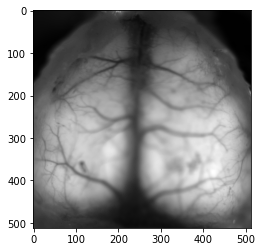

In [36]:
plt.figure()
plt.imshow(mimg,cmap='gray') 
plt.show()  # display it

In [43]:
tstart = 1860
tend = 1870
fstart = next((indx for indx,x in enumerate(T) if x > tstart), None)
fend = next((indx for indx,x in enumerate(T) if x > tend), None)
print(fstart, fend)
U1 = U[:,:,:50]
V1 = V[fstart:fend,:50].T
dV1 =np.hstack((np.zeros_like(V1[:,0]).reshape(-1,1), np.diff(V1,axis=1)))
trace = Ur@dV1
trace = trace.reshape(U1.shape[0],U1.shape[1],-1)

65008 65358


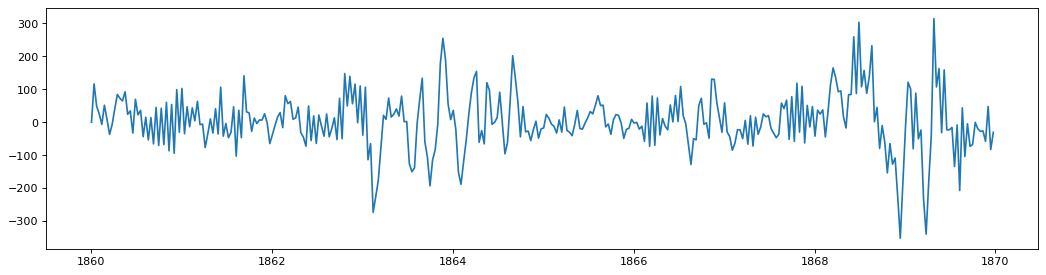

In [49]:
plt.figure(figsize=(16, 4), dpi=80)
plt.plot(T[fstart:fend],trace[400,400,:])
plt.show()

In [166]:
sos = signal.butter(2, [2,8], 'bandpass', fs=35, output='sos')
filtered = signal.sosfiltfilt(sos, trace,axis = 2)

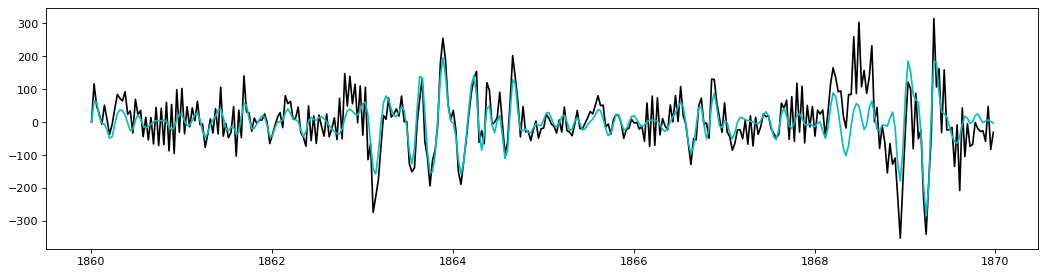

In [167]:
plt.figure(figsize=(16, 4), dpi=80)
plt.plot(T[fstart:fend],trace[400,400,:],'k-',label='input')
plt.plot(T[fstart:fend],filtered[400,400,:], 'c-', linewidth=1.5, label='pad')
plt.show()

In [168]:
filtered_mean = np.mean(filtered,2)
filtered_mean = filtered_mean[:,:, np.newaxis]
filtered = filtered-filtered_mean

In [169]:
analytic_signal = hilbert(filtered,axis=2)
amplitude_envelope = np.abs(analytic_signal)
# instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_phase = np.angle(analytic_signal,deg=False)

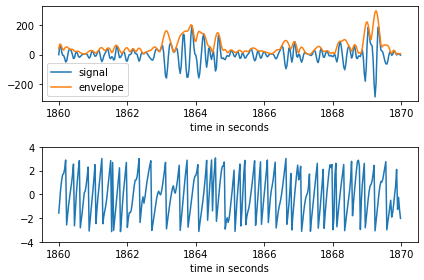

In [170]:
fig, (ax0,ax1) = plt.subplots(nrows=2)
ax0.plot(T[fstart:fend], filtered[400,400,:], label='signal')
ax0.plot(T[fstart:fend], amplitude_envelope[400,400,:], label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(T[fstart:fend], instantaneous_phase[400,400,:],label='phase')
ax1.set_xlabel("time in seconds")
ax1.set_ylim(-4,4)
fig.tight_layout()

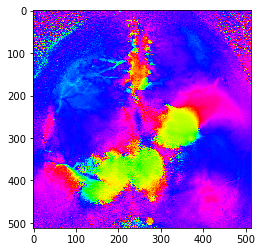

In [174]:
plt.figure()
plt.imshow(instantaneous_phase[:,:,199],cmap='hsv', interpolation= 'None',clim=[-np.pi,np.pi]) 
plt.show()  # display it

In [180]:
def filter_and_hilbert(U, dV):
    """
    U1 shape: x * y * 50 components
    dV1 shape: 50 components * time_samples
    """
    Ur = U.reshape(-1,50)
    trace = Ur@dV
    trace = trace.reshape(U1.shape[0],U1.shape[1],-1)
    sos = signal.butter(2, [2,8], 'bandpass', fs=35, output='sos')
    filtered = signal.sosfiltfilt(sos, trace,axis = 2)
    filtered_mean = np.mean(filtered,2)
    filtered_mean = filtered_mean[:,:, np.newaxis]
    filtered = filtered-filtered_mean
    analytic_signal = hilbert(filtered,axis=2)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.angle(analytic_signal,deg=False)    
    return filtered, amplitude_envelope, instantaneous_phase    

In [181]:
tstart = 1860
tend = 1870
fstart = next((indx for indx,x in enumerate(T) if x > tstart), None)
fend = next((indx for indx,x in enumerate(T) if x > tend), None)
print(fstart, fend)
U1 = U[:,:,:50]
V1 = V[fstart:fend,:50].T
T1 = T[fstart:fend]
dV1 =np.hstack((np.zeros_like(V1[:,0]).reshape(-1,1), np.diff(V1,axis=1)))
(filtered,amplitude_envelope,instantaneous_phase) = filter_and_hilbert(U1, dV1)

65008 65358


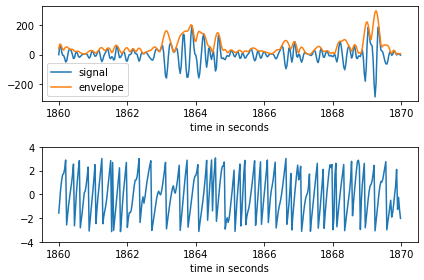

In [182]:
fig, (ax0,ax1) = plt.subplots(nrows=2)
ax0.plot(T[fstart:fend], filtered[400,400,:], label='signal')
ax0.plot(T[fstart:fend], amplitude_envelope[400,400,:], label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(T[fstart:fend], instantaneous_phase[400,400,:],label='phase')
ax1.set_xlabel("time in seconds")
ax1.set_ylim(-4,4)
fig.tight_layout()

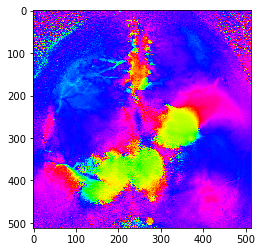

In [179]:
plt.figure()
plt.imshow(instantaneous_phase[:,:,199],cmap='hsv', interpolation= 'None',clim=[-np.pi,np.pi]) 
plt.show()  # display it